<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con Support Vector Machine

Ejemplo de clasificación utilizando support vector machine para la clasificación de un dataset sintético y ver como este clasificador divide utilizando su hiper-plano<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('dataset_test_clf.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/dataset_test_clf.csv > dataset_test_clf.csv
    else:
        !wget dataset_test_clf.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/dataset_test_clf.csv

### `dataset_test_clf.csv`:
El dataset **`dataset_test_clf.csv`** es un dataset sintético generado para probar y comprar clasificadores que utilizan un hiper-plano para separar los datos<br>

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [3]:
df = pd.read_csv("dataset_test_clf.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.562576,0.248968,0.560000
std,0.848907,0.504196,0.498888
min,-1.163033,-1.024324,0.000000
25%,-0.012401,-0.156395,0.000000
50%,0.591460,0.300005,1.000000
75%,1.157193,0.642830,1.000000
max,2.162433,1.165881,1.000000
Nan,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000


In [4]:
df.head()

,x1,x2,y
0,0.211421,-0.097180,1.0
1,-0.266959,0.870837,0.0
2,0.972220,0.309585,0.0
3,0.974682,0.649651,0.0
4,0.585224,0.830778,0.0


In [5]:
print('Cantidad de datos en observacion:', df.shape[0])

Cantidad de datos en observacion: 100


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

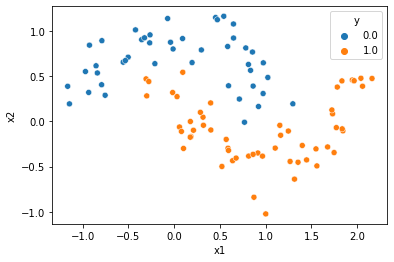

In [6]:
# Exploramos la distribución del dataset
sns.scatterplot(data=df, x="x1", y="x2", hue="y")
plt.show()

# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

El primer paso es obtener los datos que serán la entrada del sistema (X) y los datos que serán la salida del modelo estimador (y)

In [7]:
X = df.drop('y', axis=1).values
y = df['y'].values

Siguiente paso es dividir el dataset en entrenamiento (train) y evaluación (test). Utilizaremos el criterio 70%30%

In [8]:
from sklearn.model_selection import train_test_split
# Fijamos un "random_state" constante para que siempre el dataset se parta de la misma forma
# para poder repetir los ensayos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Crear un modelo de clasificación con SVM
Kernels que se pueden utilizar (defecto rbf):
- linear --> Kernel lineal (igual a la regresion logística)
- poly --> Igual que el polinomial de la regresión
- Radial basis function (rbf) --> Es el que viene por defecto
- sigmoid

In [9]:
from sklearn import svm
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_hat_linear = clf_linear.predict(X_test)

In [10]:
from sklearn import svm
clf_poly = svm.SVC(kernel='poly', degree=3)
clf_poly.fit(X_train, y_train)
y_hat_poly = clf_poly.predict(X_test)

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [11]:
# Calcular la exactitud (accuracy)
from sklearn.metrics import accuracy_score
print('Linear accuracy:', accuracy_score(y_test, y_hat_linear, normalize=True))
print('Poly accuracy:', accuracy_score(y_test, y_hat_poly, normalize=True))

Linear accuracy: 0.9
Poly accuracy: 0.9666666666666667


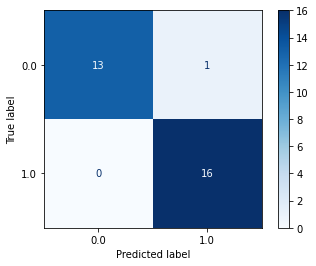

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat_poly)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf_poly.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

In [13]:
def plot_decision_regions(X, y, clf):
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    fig = plt.figure()
    ax = fig.add_subplot()

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')

    plt.show()

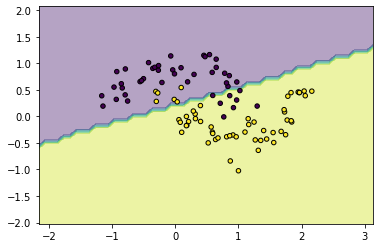

In [14]:
plot_decision_regions(X, y, clf_linear)

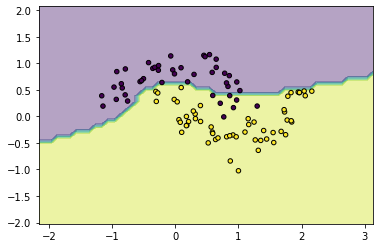

In [15]:
plot_decision_regions(X, y, clf_poly)

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Se puede observar SVM nos permite crear un separador no lineal el cual puede ser más flexible y adaptarse mejor a los datos. No hay que abusar de la complejidad del separador para no tener overfitting